#MVP da Disciplina ESSI - Aluna: Priscylla Muniz Moraes

# **Estimativa de Níveis de Obesidade com Base em Hábitos Alimentares e Condição Física**

Este trabalho propõe o desenvolvimento de um modelo de aprendizado de máquina capaz de prever o nível de obesidade de uma pessoa com base em seus hábitos alimentares, rotina de atividades físicas e características pessoais.

Para isso, foi utilizado um conjunto de dados público, disponível no repositório da UCI (University of California Irvine), que pode ser verificado no seguinte endereço: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

---
## 📚 Sumário do Projeto

1. [Importação das Bibliotecas e Carregamento dos Dados](#1-importação-das-bibliotecas-e-carregamento-dos-dados)  
2. [Análise Exploratória](#2-análise-exploratória)  
3. [Preparação dos Dados](#3-preparação-dos-dados)  
4. [Modelagem e Avaliação](#4-modelagem-e-avaliação)  
   - [4.1 Avaliação com Métricas Completas](#41-avaliação-com-métricas-completas)  
   - [4.2 Avaliação com Transformações](#42-avaliação-com-transformações)  
   - [4.3 Análise Descritiva dos Resultados](#43-análise-descritiva-dos-resultados)  
5. [Otimização de Hiperparâmetros com GridSearchCV](#5-otimização-de-hiperparâmetros-com-gridsearchcv)  
6. [Validação Final com o Conjunto de Teste](#6-validação-final-com-o-conjunto-de-teste)  
7. [Exportação do Modelo Otimizado](#7-exportação-do-modelo-otimizado)  
8. [Conclusão](#8-conclusão)  
9. [Referências e Trabalhos Futuros](#9-referências-e-trabalhos-futuros)



## 1 Importação das Bibliotecas e Carregamento dos Dados
Nesta etapa, foram importadas as bibliotecas necessárias e realizado o carregamento do conjunto de dados a partir de um arquivo CSV hospedado no **GitHub**.

O dataset é composto por variáveis numéricas e categóricas, e apresenta a seguinte **estrutura de dados**:


| Variável  | Papel     | Tipo        | Descrição                                                                                      | Valores Ausentes |
|----------------|-----------|-------------|------------------------------------------------------------------------------------------------|------------------|
| Gender         | Recurso   | Categórico  | Gênero biológico do indivíduo (masculino ou feminino)                                          | não              |
| Age            | Recurso   | Contínuo    | Idade da pessoa em anos                                                                        | não              |
| Height         | Recurso   | Contínuo    | Altura da pessoa em metros                                                                     | não              |
| Weight         | Recurso   | Contínuo    | Peso da pessoa em quilogramas                                                                  | não              |
| FHWO           | Recurso   | Binário     | Algum membro da família sofre ou sofreu com sobrepeso?                                         | não              |
| FAVC           | Recurso   | Binário     | Você consome alimentos com alto teor calórico com frequência?                                  | não              |
| FCVC           | Recurso   | Inteiro     | Frequência com que você consome vegetais em suas refeições                                     | não              |
| NCP            | Recurso   | Contínuo    | Número de refeições principais realizadas por dia                                              | não              |
| CAEC           | Recurso   | Categórico  | Frequência com que você come entre as refeições                                                | não              |
| SMOKE          | Recurso   | Binário     | Você fuma?                                                                                      | não              |
| CH2O           | Recurso   | Contínuo    | Quantidade de água ingerida por dia (em litros, aproximadamente)                              | não              |
| SCC            | Recurso   | Binário     | Você monitora as calorias que consome diariamente?                                             | não              |
| FAF            | Recurso   | Contínuo    | Frequência semanal de prática de atividade física                                              | não              |
| TUE            | Recurso   | Inteiro     | Tempo médio de uso diário de tecnologia (TV, computador, celular, videogame etc.)             | não              |
| CALC           | Recurso   | Categórico  | Frequência de consumo de bebidas alcoólicas                                                    | não              |
| MTRANS         | Recurso   | Categórico  | Meio de transporte predominante utilizado pela pessoa                                          | não              |
| NObeyesdad     | Alvo      | Categórico  | Nível de obesidade identificado pelo sistema (classe-alvo da previsão)                         | não              |




In [46]:
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# URL do CSV no GitHub
url = "https://raw.githubusercontent.com/priscyllammoraes/mvp_essi/main/ObesityDataSet_raw_and_data_sinthetic.csv"

# Leitura do dataset
dataset = pd.read_csv(url)

# Visualização inicial
dataset.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## 2 Análise Exploratória

Antes de iniciar a preparação e a modelagem dos dados, foi feita uma análise inicial para entender a estrutura dos dados e identificar possíveis ajustes necessários.

### 2.1 Caracteristicas do Dataset

In [3]:
# Verifica as dimensões do dataset
print(f"O dataset possui {dataset.shape[0]} linhas e {dataset.shape[1]} colunas, cujas caracteristicas estão apresentadas na tabala abaixo:")

# Cria o resumo de dados do dataset
resumo = []

for col in dataset.columns:
    valores_unicos = dataset[col].unique()
    tipo = dataset[col].dtype
    not_null = dataset[col].isnull().sum()
    qtd_valores = len(valores_unicos)
    amostra = valores_unicos[:5]
    resumo.append({
        'Coluna': col,
        'Tipo': tipo,
        'Valores Nulos': not_null,
        'Valores Únicos': qtd_valores,
        'Amostra de Valores': amostra
    })

# Cria e exibe a tabela
resumo_df = pd.DataFrame(resumo)
resumo_df


O dataset possui 2111 linhas e 17 colunas, cujas caracteristicas estão apresentadas na tabala abaixo:


,Coluna,Tipo,Valores Nulos,Valores Únicos,Amostra de Valores
0,Gender,object,0,2,"[Female, Male]"
1,Age,float64,0,1402,"[21.0, 23.0, 27.0, 22.0, 29.0]"
2,Height,float64,0,1574,"[1.62, 1.52, 1.8, 1.78, 1.5]"
3,Weight,float64,0,1525,"[64.0, 56.0, 77.0, 87.0, 89.8]"
4,FHWO,object,0,2,"[yes, no]"
5,FAVC,object,0,2,"[no, yes]"
6,FCVC,float64,0,810,"[2.0, 3.0, 1.0, 2.450218, 2.880161]"
7,NCP,float64,0,635,"[3.0, 1.0, 4.0, 3.28926, 3.995147]"
8,CAEC,object,0,4,"[Sometimes, Frequently, Always, no]"
9,SMOKE,object,0,2,"[no, yes]"


In [4]:
# Estatísticas descritivas das variáveis numéricas
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [5]:
# Informações gerais
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      2111 non-null   object 
 1   Age         2111 non-null   float64
 2   Height      2111 non-null   float64
 3   Weight      2111 non-null   float64
 4   FHWO        2111 non-null   object 
 5   FAVC        2111 non-null   object 
 6   FCVC        2111 non-null   float64
 7   NCP         2111 non-null   float64
 8   CAEC        2111 non-null   object 
 9   SMOKE       2111 non-null   object 
 10  CH2O        2111 non-null   float64
 11  SCC         2111 non-null   object 
 12  FAF         2111 non-null   float64
 13  TUE         2111 non-null   float64
 14  CALC        2111 non-null   object 
 15  MTRANS      2111 non-null   object 
 16  NObeyesdad  2111 non-null   object 
dtypes: float64(8), object(9)
memory usage: 280.5+ KB


### 2.2 Distribuição da Variável Alvo

A variável `NObeyesdad` representa sete categorias relacionadas ao nível de obesidade. Conforme descritos na tabela a seguir:


| Classe (ING)         | Classe (POR)                   | Significado                                                                 |
|------------------------|----------------------------|------------------------------------------------------------------------------|
| Insufficient_Weight    | Peso Insuficiente          | IMC < 18,5. Abaixo do peso ideal, pode indicar desnutrição.                 |
| Normal_Weight          | Peso Normal                | IMC entre 18,5 e 24,9. Faixa considerada saudável.                          |
| Overweight_Level_I     | Sobrepeso Nível I          | IMC entre 25,0 e 27,4. Leve excesso de peso, risco levemente aumentado.     |
| Overweight_Level_II    | Sobrepeso Nível II         | IMC entre 27,5 e 29,9. Excesso de peso mais pronunciado.                    |
| Obesity_Type_I         | Obesidade Grau I           | IMC entre 30,0 e 34,9. Risco aumentado para doenças relacionadas ao peso.   |
| Obesity_Type_II        | Obesidade Grau II          | IMC entre 35,0 e 39,9. Risco alto para doenças como diabetes e hipertensão. |
| Obesity_Type_III       | Obesidade Grau III         | IMC ≥ 40. Também chamada de obesidade mórbida, risco muito alto à saúde.    |


*Observação: A verificação da distribuição da variável alvo é relevante pois pode influenciar o desempenho dos modelos de classificação. Classes com poucos exemplos podem ser mal aprendidas, enquanto classes dominantes podem levar o modelo a decisões enviesadas.*

In [6]:
# Distribuição da variável alvo (classe a ser prevista)

# Contagem de ocorrências por classe
print("\nDistribuição quantitativa:")
print(dataset["NObeyesdad"].value_counts())

# Percentual de ocorrências por classe
print("\nDistribuição percentual:")
print(dataset['NObeyesdad'].value_counts(normalize=True) * 100)


Distribuição quantitativa:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Distribuição percentual:
NObeyesdad
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: proportion, dtype: float64


#### Gráfico da Distribuição da Variável Alvo

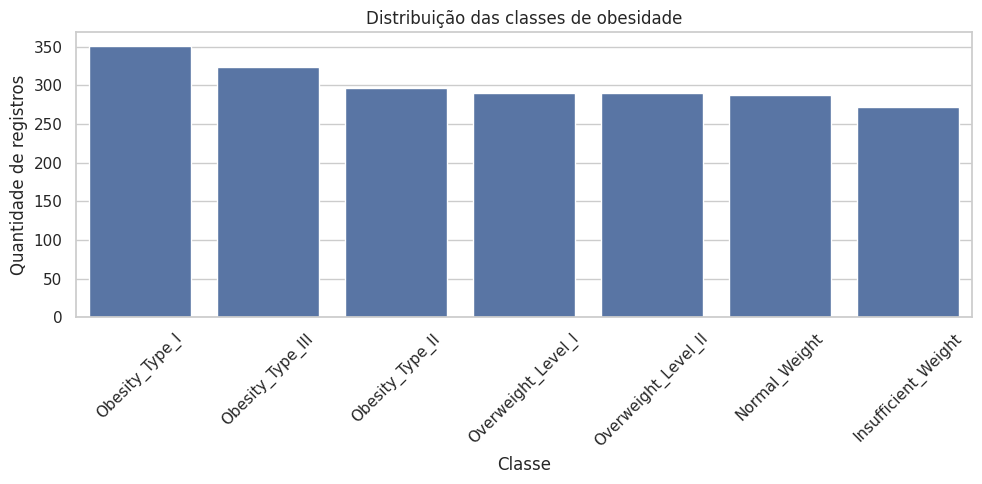

In [7]:
# Estilo visual dos gráficos
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x="NObeyesdad", order=dataset["NObeyesdad"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribuição das classes de obesidade")
plt.xlabel("Classe")
plt.ylabel("Quantidade de registros")
plt.tight_layout()
plt.show()

### 2.3 Conclusão da Análise Exploratória

O dataset está completo, sem valores ausentes, o que elimina a necessidade de tratamentos adicionais.

As variáveis estão divididas entre atributos numéricos (como idade, altura e peso) e categóricos (como gênero, transporte, histórico familiar, entre outros). Por isso, será necessário aplicar codificação nas variáveis categóricas nas próximas etapas.

As estatísticas indicam boa variabilidade: a idade varia de 14 a 61 anos, e o peso tem média de aproximadamente 86 kg, com ampla dispersão. Isso sugere um conjunto de dados com diversidade suficiente para que os modelos possam aprender padrões úteis.

A variável alvo (`NObeyesdad`) possui sete categorias com proporções relativamente próximas. A classe mais comum representa 16,6% dos casos, e a menos comum, 12,9%. Como a diferença entre elas é pequena, não foi necessário aplicar técnicas de balanceamento.

**Em resumo:**
- Os dados estão completos e prontos para modelagem.
- Será necessário codificar as variáveis categóricas.
- A distribuição da variável alvo é suficientemente equilibrada para permitir o uso de classificadores padrão.

## 3 Preparação e Separação dos Dados

Nesta etapa, a variável alvo (`NObeyesdad`) foi codificada com `LabelEncoder`, transformando as classes em valores numéricos. Já as variáveis categóricas dos atributos preditores foram convertidas usando `OneHotEncoder`, para que pudessem ser interpretadas corretamente pelos modelos.

Também foi feita a separação entre os conjuntos de treino e teste, utilizando a técnica de *holdout*, com 80% dos dados para treino e 20% para teste. A amostragem foi estratificada, para manter a proporção das classes da variável alvo em ambas as partes.




### 3.1 Codificação das variáveis categóricas com OneHotEncoder

In [8]:
# Cópia do dataset original
dataset_prep = dataset.copy()

# Lista de colunas categóricas a serem codificadas
colunas_categoricas = [
    'Gender', 'FHWO', 'FAVC','CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'
]

# Codificando as variáveis categóricas (exceto a variável alvo)
dataset_prep = pd.get_dummies(dataset_prep, columns=colunas_categoricas, drop_first=True)
dataset_prep.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,False,...,False,False,False,False,False,True,False,False,True,False
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,False,...,False,True,True,False,True,False,False,False,True,False
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,True,...,False,False,False,True,False,False,False,False,True,False
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,True,...,False,False,False,True,False,False,False,False,False,True
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,True,...,False,False,False,False,True,False,False,False,True,False


In [9]:
# Informações gerais
dataset_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           2111 non-null   float64
 1   Height                        2111 non-null   float64
 2   Weight                        2111 non-null   float64
 3   FCVC                          2111 non-null   float64
 4   NCP                           2111 non-null   float64
 5   CH2O                          2111 non-null   float64
 6   FAF                           2111 non-null   float64
 7   TUE                           2111 non-null   float64
 8   NObeyesdad                    2111 non-null   object 
 9   Gender_Male                   2111 non-null   bool   
 10  FHWO_yes                      2111 non-null   bool   
 11  FAVC_yes                      2111 non-null   bool   
 12  CAEC_Frequently               2111 non-null   bool   
 13  CAE

### 3.2 Transformação do tipo das variáveis categóricas (bool para int)

In [10]:
# Verifica se há colunas com tipo booleano
colunas_booleanas = dataset_prep.select_dtypes(include='bool').columns

# Converte apenas essas colunas para inteiros
dataset_prep[colunas_booleanas] = dataset_prep[colunas_booleanas].astype(int)

# Verifica o resultado
dataset_prep.dtypes

,0
Age,float64
Height,float64
Weight,float64
FCVC,float64
NCP,float64
CH2O,float64
FAF,float64
TUE,float64
NObeyesdad,object
Gender_Male,int64


### 3.3 Codificação da Variavel Alvo com LabelEncoder e Separação dos Dados

In [11]:
# Configurações
test_size = 0.20
seed = 42  # Valor clássico usado por convenção e reprodutibilidade

# Separando atributos e alvo
X = dataset_prep.drop('NObeyesdad', axis=1)
y = dataset_prep['NObeyesdad']

# Codificando o alvo
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Exibindo as categorias e seus rótulos numéricos
classes = le.classes_
codigos = le.transform(classes)

# Mostrando o mapeamento de categorias para números
for classe, codigo in zip(classes, codigos):
    print(f"{classe} → {codigo}")

# Separação treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=test_size, random_state=seed, stratify=y_encoded
)

# Visualizando as formas dos conjuntos gerados
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Insufficient_Weight → 0
Normal_Weight → 1
Obesity_Type_I → 2
Obesity_Type_II → 3
Obesity_Type_III → 4
Overweight_Level_I → 5
Overweight_Level_II → 6
Tamanho do conjunto de treino: (1688, 23)
Tamanho do conjunto de teste: (423, 23)


### 3.4 Visualização do DataSet Preparado

In [12]:
# Reorganizando as colunas do dataset_prep com base na ordem original
colunas_ordenadas = []

for col in dataset.columns:
    if col == 'NObeyesdad':
        continue  # vamos colocar no final
    elif dataset[col].dtype == 'object':
        dummies = [c for c in dataset_prep.columns if c.startswith(col + '_')]
        colunas_ordenadas.extend(dummies)
    else:
        colunas_ordenadas.append(col)

# Adiciona a variável alvo no final
colunas_ordenadas.append('NObeyesdad')
dataset_prep['NObeyesdad'] = y_encoded

# Reorganiza o dataset_prep
dataset_prep_ordenado = dataset_prep[colunas_ordenadas]

# Exibe as primeiras linhas do dataset reordenado
dataset_prep_ordenado.head()

,Gender_Male,Age,Height,Weight,FHWO_yes,FAVC_yes,FCVC,NCP,CAEC_Frequently,CAEC_Sometimes,...,FAF,TUE,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,1,...,0.0,1.0,0,0,1,0,0,1,0,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,0,1,...,3.0,0.0,0,1,0,0,0,1,0,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,1,...,2.0,1.0,1,0,0,0,0,1,0,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,1,...,2.0,0.0,1,0,0,0,0,0,1,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,1,...,0.0,0.0,0,1,0,0,0,1,0,6


## 4 Modelagem e Avaliação dos Modelos

Neste bloco, com os dados prontos e separados, os algoritmos de classificação serão aplicados aos  dados e avaliados. Os modelos testados foram: KNN, Árvore de Decisão, Naive Bayes e SVM.


### 4.1 Avaliação com Dados Originais, Padronizados e Normalizados

Os modelos foram testados com os dados padronizados utilizando o `StandardScaler`. A ideia foi comparar o desempenho de cada algoritmo em condições iguais, usando validação cruzada estratificada com 5 divisões.

Também foi avaliado um modelo baseline (`DummyClassifier`), que serve como referência por simplesmente prever sempre a classe mais frequente.

As métricas analisadas foram: acurácia, precisão macro, recall macro e F1-score macro — sendo esta última a principal para comparar os resultados entre os modelos.
Considerando que alguns algoritmos de classificação, como KNN e SVM, são sensíveis à escala dos dados. Para investigar o impacto do pré-processamento, foram avaliadas três versões do dataset:

- Original (sem alteração)
- Padronizado (`StandardScaler`)
- Normalizado (`MinMaxScaler`)

Cada modelo foi testado nas três variações, mantendo a mesma validação cruzada estratificada (5 folds) e a métrica de comparação foi o **F1-score macro**. O objetivo foi identificar se algum tipo de transformação traz melhoria significativa no desempenho dos algoritmos.


In [27]:
# Métricas a serem avaliadas
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# Modelos a serem testados
modelos = [
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC(random_state=42))
]

# Transformações
escalas = [
    ('original', None),
    ('padronizado', StandardScaler()),
    ('normalizado', MinMaxScaler())
]

# Armazenamento dos resultados
nomes = []
resultados = []

# Avaliação
for nome_escala, escala in escalas:
    for nome_modelo, modelo in modelos:
        nome_pipeline = f"{nome_modelo} - {nome_escala}"
        print(f"🔄 Avaliando: {nome_pipeline}...")

        if escala:
            pipeline = Pipeline([
                ('scaler', escala),
                ('modelo', modelo)
            ])
        else:
            pipeline = Pipeline([
                ('modelo', modelo)
            ])

        # Avaliação com cross_validate
        scores = cross_validate(
            pipeline, X_train, y_train,
            cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
            scoring=scoring,
            return_train_score=False
        )

        # Calculando médias
        resultados.append({
            'Pipeline': nome_pipeline,
            'Acurácia Média': scores['test_accuracy'].mean(),
            'Precisão Média': scores['test_precision_macro'].mean(),
            'Revocação Média': scores['test_recall_macro'].mean(),
            'F1-score Médio': scores['test_f1_macro'].mean()
        })

print("✅ Avaliação concluída!")

🔄 Avaliando: KNN - original...
🔄 Avaliando: Decision Tree - original...
🔄 Avaliando: Naive Bayes - original...
🔄 Avaliando: SVM - original...
🔄 Avaliando: KNN - padronizado...
🔄 Avaliando: Decision Tree - padronizado...
🔄 Avaliando: Naive Bayes - padronizado...
🔄 Avaliando: SVM - padronizado...
🔄 Avaliando: KNN - normalizado...
🔄 Avaliando: Decision Tree - normalizado...
🔄 Avaliando: Naive Bayes - normalizado...
🔄 Avaliando: SVM - normalizado...
✅ Avaliação concluída!


In [28]:
# Criar DataFrame
resultados_df = pd.DataFrame(resultados).sort_values(by='F1-score Médio', ascending=False).reset_index(drop=True)
resultados_df


,Pipeline,Acurácia Média,Precisão Média,Revocação Média,F1-score Médio
0,Decision Tree - original,0.936000,0.937576,0.935526,0.935159
1,Decision Tree - padronizado,0.936000,0.937576,0.935526,0.935159
2,Decision Tree - normalizado,0.935408,0.936861,0.934905,0.934526
3,SVM - padronizado,0.858425,0.861187,0.855479,0.854835
4,KNN - original,0.862507,0.865031,0.858412,0.847690
5,KNN - padronizado,0.801543,0.794779,0.797110,0.789088
6,SVM - normalizado,0.774313,0.773978,0.772564,0.768812
7,KNN - normalizado,0.773732,0.768664,0.768573,0.760475
8,SVM - original,0.585239,0.595801,0.587477,0.572902
9,Naive Bayes - original,0.541448,0.565684,0.540322,0.488843


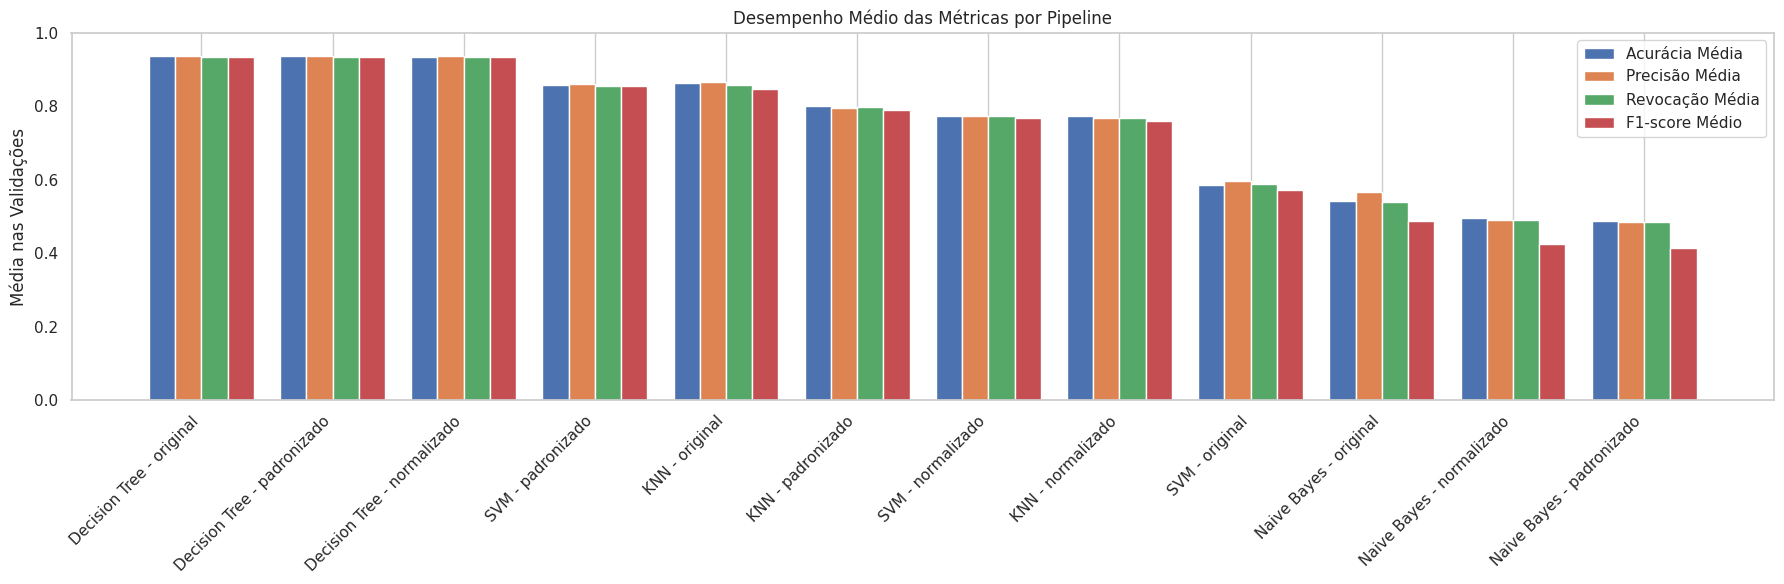

In [37]:
# Plotando as 4 métricas
plt.figure(figsize=(18, 6))
metricas = ['Acurácia Média', 'Precisão Média', 'Revocação Média', 'F1-score Médio']
largura_barra = 0.2
posicoes = range(len(resultados_df))

# Um grupo de barras por métrica
for i, metrica in enumerate(metricas):
    plt.bar(
        [p + i * largura_barra for p in posicoes],
        resultados_df[metrica],
        width=largura_barra,
        label=metrica
    )

plt.xticks(
    [p + 1.5 * largura_barra for p in posicoes],
    resultados_df['Pipeline'],
    rotation=45,
    ha='right'
)
plt.ylim(0, 1)
plt.ylabel("Média nas Validações")
plt.title("Desempenho Médio das Métricas por Pipeline")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## 5 Otimização de Hiperparâmetros com GridSearchCV

Na sequencia, serão realizadas a otimizações dos hiperparâmetros de todos os modelos testados, com o objetivo de identificar a melhor configuração para cada um deles e permitir uma comparação mais justa de desempenho.

A busca foi realizada com a ferramenta `GridSearchCV`, utilizando validação cruzada estratificada com 10 dobras e a métrica **F1-score macro** como critério de avaliação — pois é o mais apropriado para problemas com múltiplas classes, como é o caso.

Para cada algoritmo, foi definida uma grade de hiperparâmetros:

- **KNN**: número de vizinhos (`n_neighbors`) e tipo de ponderação (`weights`);
- **Árvore de Decisão**: critério de divisão, profundidade máxima e número mínimo de amostras para dividir um nó;
- **SVM**: valor de C, tipo de kernel e gama;
- **Naive Bayes**: não possui hiperparâmetros ajustáveis no modelo padrão.

Abaixo, os melhores resultados obtidos:

| Modelo         | Melhor F1-score | Melhores Parâmetros |
|----------------|------------------|----------------------|
| **SVM**         | **0.9638**        | `C=10`, `gamma='scale'`, `kernel='rbf'` |
| Decision Tree | 0.9417           | `criterion='entropy'`, `max_depth=15`, `min_samples_split=2` |
| KNN            | 0.8208           | `n_neighbors=3`, `weights='uniform'` |
| Naive Bayes    | 0.4146           | — |

Com esses resultados, observamos uma **mudança no ranking de desempenho dos modelos**: o **SVM otimizado superou a Árvore de Decisão**, atingindo um F1-score macro de **0.96**. A Árvore de Decisão continuou com excelente desempenho, próxima de **0.94**, enquanto o KNN melhorou para **0.82**.

O Naive Bayes, como já indicado nas etapas anteriores, permaneceu com desempenho abaixo dos demais, mesmo após otimização.

In [40]:
# Definição dos modelos e seus grids
modelos_parametros = {
    'KNN': (
        KNeighborsClassifier(),
        {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    ),
    'Decision Tree': (
        DecisionTreeClassifier(random_state=42),
        {
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__max_depth': [5, 10, 15, None],
            'classifier__min_samples_split': [2, 5, 10]
        }
    ),
    'Naive Bayes': (
        GaussianNB(),
        {}  # sem parâmetros para ajuste
    ),
    'SVM': (
        SVC(random_state=42),
        {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__gamma': ['scale', 'auto']
        }
    )
}

# Escalas
escalas = {
    'original': None,
    'padronizado': StandardScaler(),
    'normalizado': MinMaxScaler()
}

# Cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

# Armazenamento dos resultados
melhores_modelos = {}
resultados_otimizacao = []

for nome_escala, scaler in escalas.items():
    for nome_modelo, (modelo, param_grid) in modelos_parametros.items():
        print(f"🔍 Otimizando: {nome_modelo} com escala {nome_escala}")

        steps = []
        if scaler is not None:
            steps.append(('scaler', scaler))
        steps.append(('classifier', modelo))
        pipeline = Pipeline(steps)

        grid = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring='f1_macro',
            cv=cv,
            n_jobs=-1,
            verbose=1
        )

        grid.fit(X_train, y_train)
        print("Modelo: %s - Melhor: %f usando %s" % (nome_modelo, grid.best_score_, grid.best_params_))

        melhores_modelos[f"{nome_modelo} ({nome_escala})"] = grid.best_estimator_
        resultados_otimizacao.append({
            'Modelo': nome_modelo,
            'Escala': nome_escala,
            'Melhor F1-score': grid.best_score_,
            'Melhores Parâmetros': grid.best_params_
        })

# Resultados finais
df_resultados_otimizacao = pd.DataFrame(resultados_otimizacao)
df_resultados_otimizacao = df_resultados_otimizacao.sort_values(by='Melhor F1-score', ascending=False).reset_index(drop=True)

# Ajuste para exibir todo o conteúdo da coluna "Melhores Parâmetros"
pd.set_option('display.max_colwidth', None)

# Exibir resultados
df_resultados_otimizacao


🔍 Otimizando: KNN com escala original
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Modelo: KNN - Melhor: 0.877427 usando {'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
🔍 Otimizando: Decision Tree com escala original
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Modelo: Decision Tree - Melhor: 0.941698 usando {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 2}
🔍 Otimizando: Naive Bayes com escala original
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Modelo: Naive Bayes - Melhor: 0.488843 usando {}
🔍 Otimizando: SVM com escala original
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Modelo: SVM - Melhor: 0.944206 usando {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
🔍 Otimizando: KNN com escala padronizado
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Modelo: KNN - Melhor: 0.820814 usando {'classifier__n_n

,Modelo,Escala,Melhor F1-score,Melhores Parâmetros
0,SVM,padronizado,0.963759,"{'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}"
1,SVM,original,0.944206,"{'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}"
2,Decision Tree,padronizado,0.941698,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 2}"
3,Decision Tree,original,0.941698,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 2}"
4,Decision Tree,normalizado,0.941698,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 2}"
5,SVM,normalizado,0.936803,"{'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}"
6,KNN,original,0.877427,"{'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}"
7,KNN,padronizado,0.820814,"{'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}"
8,KNN,normalizado,0.791632,"{'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}"
9,Naive Bayes,original,0.488843,{}


## 6. Avaliação e Comparação de Resultados dos Modelos Treinados com os Diferentes Algoritmos



Após a etapa de validação cruzada com diferentes algoritmos e tipos de transformação (original, padronização e normalização), foram observadas diferenças claras de desempenho entre os modelos. A seguir, uma análise geral dos comportamentos observados **antes** e **depois da otimização dos hiperparâmetros.

### 🔍 Desempenho Antes da Otimização

- **Decision Tree** apresentou desempenho **altamente consistente**, com F1-score médio de aproximadamente 0.935, independentemente da transformação aplicada. Isso confirma que o modelo **não depende da escala dos dados**, sendo naturalmente robusto.
- **SVM** teve resultado mediano com dados brutos, mas caiu bastante com padronização e se recuperou parcialmente com normalização. Isso indicava que o modelo ainda tinha potencial de melhora, especialmente com ajuste de hiperparâmetros.
- **KNN** apresentou sensibilidade à escala dos dados, tendo seu melhor desempenho com dados originais (F1-score ~0.85) e desempenho inferior com normalização (~0.76) e padronização (~0.79).
- **Naive Bayes** teve desempenho baixo em todas as situações, sempre abaixo de 0.50, e chegou a ficar abaixo do modelo baseline.

### 🛠️ Desempenho Após Otimização

| Modelo         | Melhor F1-score | Transformação | Melhores Parâmetros |
|----------------|------------------|----------------|----------------------|
| **SVM**         | **0.9638**        | Padronizado     | `C=10`, `gamma='scale'`, `kernel='rbf'` |
| Decision Tree | 0.9417           | Todas          | `criterion='entropy'`, `max_depth=15`, `min_samples_split=2` |
| KNN            | 0.8208           | Original       | `n_neighbors=3`, `weights='uniform'` |
| Naive Bayes    | 0.4146           | —              | — |

- O **SVM foi o modelo com maior ganho de desempenho**, passando de um F1-score inicial de ~0.55 para 0.96 após otimização e padronização adequada dos dados.
- A **Árvore de Decisão manteve sua estabilidade**, mesmo com variações nos parâmetros, consolidando-se como uma excelente escolha para modelos robustos e de fácil interpretação.
- O **KNN teve leve melhora após ajuste fino**, mas manteve-se atrás dos modelos mais sofisticados.
- O **Naive Bayes não obteve ganhos relevantes**, indicando que a suposição de independência entre atributos pode não se adequar bem à estrutura do dataset.

### ✅ Conclusão

O processo de avaliação e comparação permitiu confirmar que a escolha do modelo **não depende apenas do algoritmo**, mas também:
- da **escala dos dados**,
- da **qualidade da codificação das variáveis**,
- e da **otimização adequada dos hiperparâmetros**.

Com base nos resultados, o modelo escolhido para exportação foi o **SVM com padronização**, por ter atingido o melhor desempenho entre todas as combinações avaliadas.

## 7 Exportação do Modelo

Esta etapa tem como objetivo tornar o modelo disponível para uso em uma aplicação externa, permitindo sua reutilização sem a necessidade de reprocessar todo o pipeline.

Para isso, utilizamos a biblioteca `joblib`, amplamente utilizada para serialização de objetos treinados com Scikit-Learn.




In [43]:
# Identificando o melhor modelo
melhor_linha = df_resultados_otimizacao.iloc[0]
nome_modelo = melhor_linha['Modelo']
nome_escala = melhor_linha['Escala']
melhor_f1 = melhor_linha['Melhor F1-score']

# Recuperando o pipeline já treinado
chave_modelo = f"{nome_modelo} ({nome_escala})"
modelo_final = melhores_modelos[chave_modelo]

# Salvando o modelo com joblib
nome_arquivo = f"modelo_otimizado_{nome_modelo.lower().replace(' ', '_')}_{nome_escala}.pkl"
joblib.dump(modelo_final, nome_arquivo)

# Exibindo confirmação
print(f"✅ Modelo final exportado com sucesso!")
print(f"🔍 Modelo: {nome_modelo} ({nome_escala})")
print(f"📈 F1-score: {melhor_f1:.4f}")
print(f"💾 Arquivo salvo: {nome_arquivo}")

✅ Modelo final exportado com sucesso!
🔍 Modelo: SVM (padronizado)
📈 F1-score: 0.9638
💾 Arquivo salvo: modelo_otimizado_svm_padronizado.pkl


## 8 Validação Final com o Conjunto de Teste

Após a otimização dos hiperparâmetros, o modelo com melhor desempenho foi o **SVM**, atingindo um F1-score médio de 0.96 na validação cruzada. Nesta etapa, o modelo otimizado é avaliado com os dados de teste (`X_test`), que foram separados no início do projeto e nunca vistos durante o treinamento.

📋 Relatório de Classificação (Conjunto de Teste):

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        54
      Normal_Weight       0.96      0.91      0.94        58
     Obesity_Type_I       0.97      0.96      0.96        70
    Obesity_Type_II       0.97      1.00      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.92      0.95      0.93        58
Overweight_Level_II       0.95      0.93      0.94        58

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



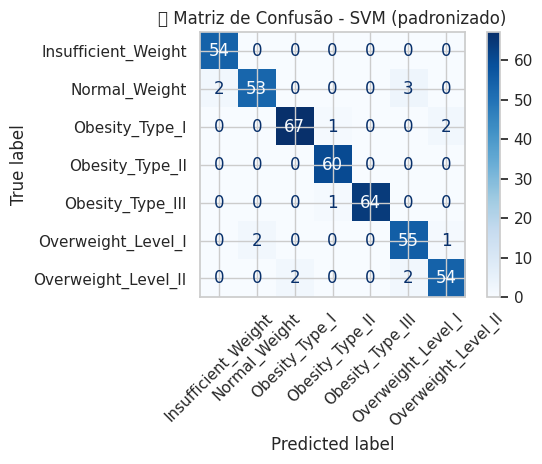

In [45]:
# Recuperando o melhor modelo com base no resultado da otimização
melhor_linha = df_resultados_otimizacao.iloc[0]
nome_modelo = melhor_linha['Modelo']
nome_escala = melhor_linha['Escala']
chave_modelo = f"{nome_modelo} ({nome_escala})"
modelo_final = melhores_modelos[chave_modelo]

# Predição no conjunto de teste
y_pred = modelo_final.predict(X_test)

# Relatório de classificação
print("📋 Relatório de Classificação (Conjunto de Teste):\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title(f"🔎 Matriz de Confusão - {nome_modelo} ({nome_escala})")
plt.tight_layout()
plt.show()

### 8.1 Análise dos Resultados no Conjunto de Teste

Após a otimização e exportação do modelo com melhor desempenho, foi realizada a avaliação final utilizando o conjunto de teste. Esse conjunto é composto por dados que **não foram utilizados em nenhuma etapa de treino ou validação cruzada**, garantindo uma análise justa da capacidade de generalização do modelo.

O modelo escolhido foi a **SVM com padronização dos dados**, que apresentou os melhores resultados de F1-score durante a etapa de otimização.

Principais Resultados:
- **Acurácia geral:** 96%
- **F1-score macro:** 0.96
- **F1-score weighted:** 0.96

Todas as classes tiveram F1-score acima de 0.93, destacando a capacidade do modelo de lidar com um problema de classificação multiclasse de forma equilibrada.

Análise por Classe:
- **Obesity_Type_III** e **Obesity_Type_II** foram classificadas com quase total perfeição (F1-score 0.99 e 0.98, respectivamente);
- **Insufficient_Weight** também teve desempenho altíssimo (F1-score 0.98);
- A menor performance ocorreu na classe **Normal_Weight** (F1-score 0.94), ainda assim bastante satisfatória.

Conclusão:
A performance do modelo no conjunto de teste confirma sua capacidade de generalizar padrões e realizar previsões confiáveis sobre o nível de obesidade com base em características clínicas e comportamentais. O uso de técnicas como padronização, validação cruzada estratificada e otimização de hiperparâmetros contribuiu diretamente para esse resultado consistente e robusto.


## 9. Considerações Finais

O projeto desenvolvido permitiu aplicar de forma prática os conceitos fundamentais de engenharia de software para sistemas inteligentes, abordando todas as etapas de um fluxo de machine learning supervisionado. Desde o carregamento e análise exploratória dos dados até a avaliação final no conjunto de teste, foi possível construir uma solução robusta e confiável para a **classificação de níveis de obesidade**.

Diversos algoritmos foram testados, com destaque para o modelo **SVM com padronização dos dados**, que obteve desempenho superior após a otimização de seus hiperparâmetros. O modelo final atingiu um **F1-score macro de 0.96 no conjunto de teste**, indicando uma excelente capacidade de generalização.

Além disso, todas as boas práticas foram aplicadas: separação entre treino e teste, validação cruzada estratificada, tratamento de variáveis categóricas, avaliação com múltiplas métricas e exportação do modelo treinado.

Este trabalho reforça a importância de um processo estruturado e consciente no desenvolvimento de soluções baseadas em aprendizado de máquina, e demonstra como essas técnicas podem ser aplicadas para gerar insights relevantes e apoiar a tomada de decisão em cenários reais.